# The Game of Life

In honor of [John Conway's](https://www.math.princeton.edu/news/john-h-conway-1937-2020) life lets code up a [Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life#Rules) simulation.

The rules:

1. Any live cell with fewer than two live neighbours dies, as if by underpopulation.
2. Any live cell with two or three live neighbours lives on to the next generation.
3. Any live cell with more than three live neighbours dies, as if by overpopulation.
4. Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

### Initial steps
Lets start with a 100 by 100 grid (matrix) filled with random numbers between 0 and 1 and plot it.

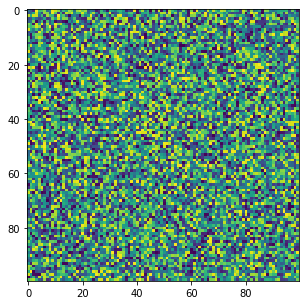

In [1]:
# import libraries
import numpy as np
from pylab import *
%matplotlib inline

N_grid = 100 # size of universe's edge

grid = np.random.rand(N_grid,N_grid) # generate random numbers in the matrix
rcParams['figure.figsize'] = 5, 5
imshow(grid) # make the plot
show()        

### Populating the universe

For the Game of Life we need a way to denote if a cell is alive or dead. Lets define that any cells with an initial value greater than a cut-off value of 0.75 or above is alive (1) and the rest are dead (0):

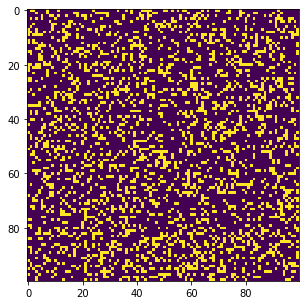

In [2]:
# need to go through and reset the random numbers with 1's or 0's
def seed_population(N_value,cut_off_value):
    grid = np.random.rand(N_value,N_value)
    # inital values equal to or greater than cut_off_value are alive (1), the rest dead (0)
    for y in range(0,N_value): # y-dir
        for x in range(0,N_value): # x-dir
            if grid[x,y] >= cut_off_value:
                grid[x,y] = 1
            else:
                grid[x,y] = 0
    return grid

N_grid = 100
cut_off = 0.75
grid = seed_population(N_grid,cut_off)
rcParams['figure.figsize'] = 5, 5
imshow(grid)
show()       

### Color Mapping
imshow() uses the default ['virdis'](https://matplotlib.org/examples/color/colormaps_reference.html) colormap which displays the pixel at (x,y) as yellow if the value at location (x,y) is one and dark purple if the value at location (x,y) is zero. The 'gray' colormap maps zero to black and one to white. There is a reverse color map for the grayscale called 'gray_r' which maps zero to white and one to black. Personally, the black (= alive) on a white (= dead) backgorund would be easier to view: 

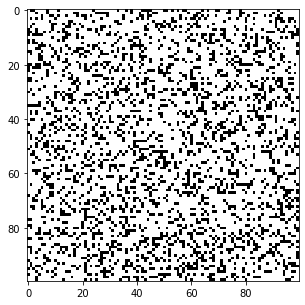

In [3]:
imshow(grid,cmap='gray_r') # matplotlib has reverse color maps!
show()

### Apply the rules

Now, lets define a function that applies the rules and test it on our grid. Note that we need to stay away from the edge since we haven't thought about how the edges wrap around (yet). Plus we need to make a distinct and separate copy of the grid so that we aren't making changes to the original as we go along which would influence the neighborhood of a cell in a way that is different from the rules.

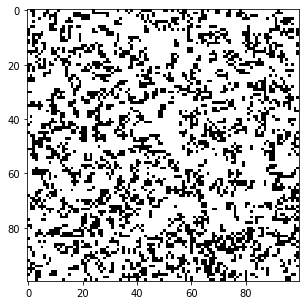

In [4]:
# now go through and apply the rules
# stay within 1 cell of the edge. We don't have a wrap around universe (yet)

def apply_rules(N_grid,grid):
    N = N_grid - 1 # max value in x & y direction
    grid_prime = np.copy(grid) # this makes a distinct & separate copy of the orignal grid
    for y in range(1,N): # y-dir
        for x in range(1,N): # x-dir
            # look on all 4 sides
            up = grid[x,y+1]
            down = grid[x,y-1]
            left = grid[x-1,y]
            right = grid[x+1,y]
            diagonal_up_left = grid[x-1,y+1]
            diagonal_up_right = grid[x+1,y+1]
            diagonal_down_left = grid[x-1,y-1]
            diagonal_down_right = grid[x+1,y-1]
            side_sum = up+down+left+right + diagonal_up_left + diagonal_up_right + diagonal_down_left + diagonal_down_right
            if grid[x,y] == 1 and side_sum < 2: # if the cell is alive but has less than 2 alive neighbors
                grid_prime[x,y] = 0 # the cell dies
            if grid[x,y] == 1 and side_sum == 2 or side_sum == 3: # if the cell is alive but has 2 or 3 live neighbors
                grid_prime[x,y] = 1 # the cell lives
            if grid[x,y] == 1 and side_sum > 3: # if the cell is alive but has greater than 3 live neighbors
                grid_prime[x,y] = 0 # the cell dies
            if grid[x,y] == 0 and side_sum == 3: # if a dead cell has 3 living neighbors then it returns to life
                grid_prime[x,y] = 1
    return grid_prime

grid_prime = apply_rules(N_grid,grid)
imshow(grid_prime, cmap='gray_r')
show()

### Let the universe evolve

Lets apply the rules over and over for 100 generations, pausing for a half-second, to watch how the universe evolves:

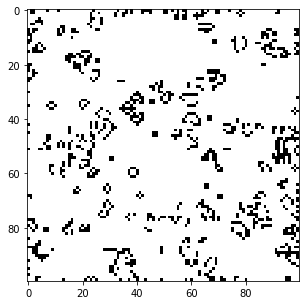

In [5]:
from time import sleep # to pause
from IPython.display import clear_output # To redraw

generation_max = 100 # how many time steps to run

# loop over the number of generations
generation = 0
while generation <= generation_max:
    # apply the rules
    grid_prime = apply_rules(N_grid,grid)
    # show the new grid
    imshow(grid_prime, cmap='gray_r')
    show()
    # give the human time to admire the current universe
    sleep(0.5)
    #  clear the old grid
    clear_output(wait=True)
    # the prime array becomes the testing array for next cycle
    grid = np.copy(grid_prime)
    # increment M
    generation = generation + 1


You will probably notice there are some groupings of cells that are static or seem to oscillate through a range of patterns when the simulation runs. These have names, apparently; check out the [wikipedia](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life#Rules) page for the Game of Life.

### Wrap-around universe

If we want to study the Game of Life under different starting conditions and time scales we should impose conditions on the universe such that the top row is adjacent to the bottom row and the left side is adjacent to the right side. So, imagine the square is stretched and wrapped around a sphere with no overlap. This is not difficult to do; just tedious.

Lets define a function that looks in the immediate vicinity of the cell, even across edges, and returns the sum of the alive cells that surround the cell in question. While we are at it, lets also modify our function that applies the rules to the cell in question.

In [6]:
def neighborhood_check(grid,N,x,y): # look on all 4 sides & diagonals even across edges
    if x == 0 and y != 0 and y != N: # left edge excluding corners
        up = grid[x,y+1]
        down = grid[x,y-1]
        left = grid[N,y]
        right = grid[x+1,y]
        diagonal_up_left = grid[N,y+1]
        diagonal_up_right = grid[x+1,y+1]
        diagonal_down_left = grid[N,y-1]
        diagonal_down_right = grid[x+1,y-1]
        side_sum = up + down + left + right + diagonal_up_left + diagonal_up_right + diagonal_down_left + diagonal_down_right
        return side_sum
    if x == N and y != 0 and y != N: # right edge excluding corners
        up = grid[x,y+1]
        down = grid[x,y-1]
        left = grid[x-1,y]
        right = grid[0,y]
        diagonal_up_left = grid[x-1,y+1]
        diagonal_up_right = grid[0,y+1]
        diagonal_down_left = grid[x-1,y-1]
        diagonal_down_right = grid[0,y-1]
        side_sum = up + down + left + right + diagonal_up_left + diagonal_up_right + diagonal_down_left + diagonal_down_right
        return side_sum
    if y == 0 and x != 0 and x != N: # bottom edge excluding corners
        up = grid[x,y+1]
        down = grid[x,N]
        left = grid[x-1,y]
        right = grid[x+1,y]
        diagonal_up_left = grid[x-1,y+1]
        diagonal_up_right = grid[x+1,y+1]
        diagonal_down_left = grid[x-1,N]
        diagonal_down_right = grid[x+1,N]
        side_sum = up + down + left + right + diagonal_up_left + diagonal_up_right + diagonal_down_left + diagonal_down_right
        return side_sum
    if y == N and x != 0 and x != N: # top edge excluding corners
        up = grid[x,0]
        down = grid[x,y-1]
        left = grid[x-1,y]
        right = grid[x+1,y]
        diagonal_up_left = grid[x-1,0]
        diagonal_up_right = grid[x+1,0]
        diagonal_down_left = grid[x-1,y-1]
        diagonal_down_right = grid[x+1,y-1]
        side_sum = up + down + left + right + diagonal_up_left + diagonal_up_right + diagonal_down_left + diagonal_down_right
        return side_sum
    if x == 0 and y == 0: # bottom left corner (x-1 -> N, y-1 -> N)
        up = grid[x,y+1]
        down = grid[x,N]
        left = grid[N,y]
        right = grid[x+1,y]
        diagonal_up_left = grid[N,y+1]
        diagonal_up_right = grid[x+1,y+1]
        diagonal_down_left = grid[N,N]
        diagonal_down_right = grid[x+1,N]
        side_sum = up + down + left + right + diagonal_up_left + diagonal_up_right + diagonal_down_left + diagonal_down_right
        return side_sum    
    if x == 0 and y == N: # top left corner (x-1 -> N, y+1 -> 0)
        up = grid[x,0]
        down = grid[x,y-1]
        left = grid[N,y]
        right = grid[x+1,y]
        diagonal_up_left = grid[N,0]
        diagonal_up_right = grid[x+1,0]
        diagonal_down_left = grid[N,y-1]
        diagonal_down_right = grid[x+1,y-1]
        side_sum = up + down + left + right + diagonal_up_left + diagonal_up_right + diagonal_down_left + diagonal_down_right
        return side_sum
    if x == N and y == N: # top right corner (x+1 -> 0, y+1 -> 0)
        up = grid[x,0]
        down = grid[x,y-1]
        left = grid[x-1,y]
        right = grid[0,y]
        diagonal_up_left = grid[x-1,0]
        diagonal_up_right = grid[0,0]
        diagonal_down_left = grid[x-1,y-1]
        diagonal_down_right = grid[0,y-1]
        side_sum = up + down + left + right + diagonal_up_left + diagonal_up_right + diagonal_down_left + diagonal_down_right
        return side_sum
    if x == N and y == 0: # bottom right corner (x+1 -> 0, y-1 -> N)
        up = grid[x,y+1]
        down = grid[x,N]
        left = grid[x-1,y]
        right = grid[0,y]
        diagonal_up_left = grid[x-1,y+1]
        diagonal_up_right = grid[0,y+1]
        diagonal_down_left = grid[x-1,N]
        diagonal_down_right = grid[0,N]
        side_sum = up + down + left + right + diagonal_up_left + diagonal_up_right + diagonal_down_left + diagonal_down_right
        return side_sum    
    else: # everything else
        up = grid[x,y+1]
        down = grid[x,y-1]
        left = grid[x-1,y]
        right = grid[x+1,y]
        diagonal_up_left = grid[x-1,y+1]
        diagonal_up_right = grid[x+1,y+1]
        diagonal_down_left = grid[x-1,y-1]
        diagonal_down_right = grid[x+1,y-1]
        side_sum = up + down + left + right + diagonal_up_left + diagonal_up_right + diagonal_down_left + diagonal_down_right
        return side_sum
    
def apply_rules(N_grid,grid):
    N = N_grid - 1 # max value in x & y direction
    grid_p = np.copy(grid) # this makes a distinct & separate copy of the orignal grid
    for y in range(0,N+1): # y-dir
        for x in range(0,N+1): # x-dir
            # look on all 4 sides
            side_sum = neighborhood_check(grid,N,x,y)
            # apply da rules
            if grid[x,y] == 1 and side_sum < 2: # if the cell is alive but has less than 2 alive neighbors
                grid_p[x,y] = 0 # the cell dies
            if grid[x,y] == 1 and side_sum == 2 or side_sum == 3: # if the cell is alive but has 2 or 3 live neighbors
                grid_p[x,y] = 1 # the cell lives
            if grid[x,y] == 1 and side_sum > 3: # if the cell is alive but has greater than 3 live neighbors
                grid_p[x,y] = 0 # the cell dies
            if grid[x,y] == 0 and side_sum == 3: # if a dead cell has 3 living neighbors then it returns to life
                grid_p[x,y] = 1
    
    return grid_p

#### Spaceship testing

Lets test that our wrap-around universe model is working correctly by creating a small universe with the simpliest mobile group of cells in The Game of Life - a glider. 

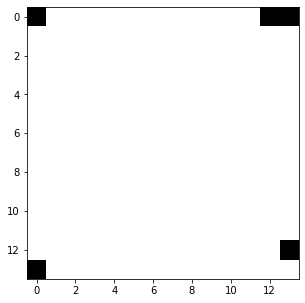

In [7]:
glider = [
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]

grid = np.array(glider)

N_grid = len(grid) # much smaller universe!
generation_max = 100
# loop over the number of generations
generation = 0
while generation < generation_max:
    # apply the rules
    grid_prime = apply_rules(N_grid,grid)
    # show the new grid
    imshow(grid_prime, cmap='gray_r')
    show()
    # give the human time to admire the current universe
    sleep(0.5)
    #  clear the old grid
    clear_output(wait=True)
    # the prime array becomes the testing array for next cycle
    grid = np.copy(grid_prime)
    # increment M
    generation = generation + 1

Hooray! It works!

#### Test on large universe
With confidence that the wrap-around universe is working lets apply our new functions to a larger universe and watch it evolve.

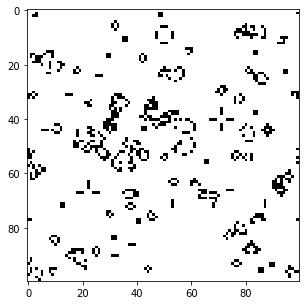

In [8]:
# user controlled variables
N_grid = 100 # size of universe's edge
cut_off = 0.75 # inital values equal to or greater than cut_off_value are alive (1), the rest dead (0)

grid = seed_population(N_grid,cut_off)
generation_max = 100
# loop over the number of generations
generation = 0
while generation <= generation_max:
    # apply the rules
    grid_prime = apply_rules(N_grid,grid)
    # show the new grid
    imshow(grid_prime, cmap='gray_r')
    show()
    # give the human time to admire the current universe
    sleep(0.5)
    #  clear the old grid
    clear_output(wait=True)
    # the prime array becomes the testing array for next cycle
    grid = np.copy(grid_prime)
    # increment M
    generation = generation + 1

### Analysis
Watching the patterns that form for different initial conditions as the universe evolves is fascinating. Some patterns are simple and persistant while others are more complex and grow larger and beautifully symmetric only to "die" into simple stationary forms or die out completely. Still other patterns are seemingly random and one hates to see them enroach onto a stable oscillating pattern.. or perhaps that is just me.

Visual inspection seems to indicate that a given initial condition of alive cells tends to die out and trend towards a small number of units. Lets compute the number of alive cells at each time step and plot the size of the population as a function of the time step for different initial conditions to study this in a more quantative way.

**Note:** the number of alive cells should be the sum of the values of the grid since an alive cell has a numerical value of 1. We can tally the population size at each time step then plot it after the given number of generations is complete. We don't need to see the universe evolve so we can cut out those lines to speed things up. 

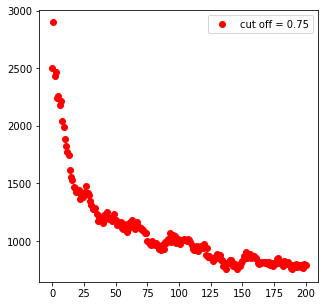

In [9]:
# user controlled variables
N_grid = 100 # size of universe's edge
cut_off = 0.75 # inital values equal to or greater than cut_off_value are alive (1), the rest dead (0)
generation_max = 200 # maximum number of generations

population_array = []
grid = seed_population(N_grid,cut_off)
# determine the initial population size
pop_size = np.sum(grid)
population_array.append(pop_size)
# loop over the number of generations
generation = 0
while generation < generation_max:
    # apply the rules
    grid_prime = apply_rules(N_grid,grid)
    # determine the population size at this time step and append to an array
    pop_size = np.sum(grid_prime)
    population_array.append(pop_size)
    # the prime array becomes the testing array for next cycle
    grid = np.copy(grid_prime)
    # increment generation
    generation = generation + 1

time_step_values = np.arange(generation_max+1)
scatter(time_step_values,population_array, color = "red", label="cut off = 0.75")
legend(loc="upper right")
show()

So, our qualitative observation was correct... the population does decrease with time and reach a sort-of steady value. It would be a good idea to compute statistics on several runs with the same starting conditions to see how consistent the trend is.

#### Statistics
We should compute the population mean and standard deviation at the same time step for an appropirately sized sample of model universes with the same starting conditions. Recall the definition of the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation):

$$\sigma = \sqrt{\frac{1}{N_s - 1}\sum_{i=1}^{N_s}(x_i - x_{mean})^2}$$

where $N_s$ is the total number of samples tested (ie the number of universes), $x_i$ is the value of the population at the current time step for the $i$-th universe, and $x_{mean}$ is the mean of the populations of the $N_s$ universes at the current time step. If we want to decrease the standard deviation we need to increase $N_s$. Let's define a function to compute the mean and standard deviation of our sample universes at each time step:

In [10]:
# Mean and Standard Deviation Function
def mean_and_std_dev(population_array,ave_max,generation_max):
    mean_array = [] # array to hold average population values at each time step
    sigma_array = [] # array to hold standard deviations of the population at each time step.
    # go through population array to compute means and standard deviations
    for j in range(generation_max): # j is the jth timestep
        my_sum = 0
        for i in range(len(population_array)): # i is the ith universe in the ensemble
            my_sum = my_sum + population_array[i][j]
        mean = my_sum/ave_max
        my_variance = 0
        for i in range(len(population_array)): # i is the ith universe in the ensemble
            my_variance = my_variance + (population_array[i][j] - mean)**2
        sigma = np.sqrt(my_variance / (ave_max - 1))
        # append mean and standard deviation to arrays
        mean_array.append(mean)
        sigma_array.append(sigma)
    return mean_array,sigma_array
    

#### Lets test it!
Lets modify our code to run 100 universes with the same starting cut-off value for seeding the universe. We'll store the total population (ie the cells that are "alive" or have a value of 1) in an array at each time step. We'll compute the mean and standard deviation at each time step and then plot the values.

Time to completition (min):  10.612989219029744


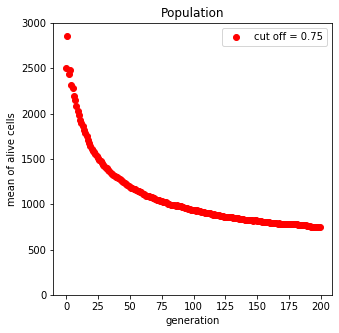

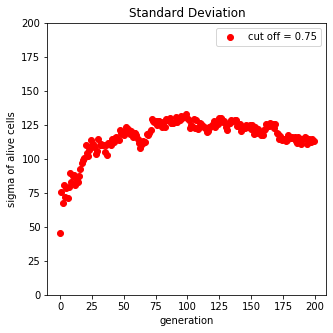

In [11]:
# lets time how long this takes
start_time = time.time()
# user controlled variables
N_grid = 100 # size of universe's edge
cut_off = 0.75 # inital values equal to or greater than cut_off_value are alive (1), the rest dead (0)
generation_max = 200 # maximum number of time steps
ave_max = 100 # total number of averages

population_array = [] # this will be an array of arrays

# loop over the number of generations
ave_num = 0
while ave_num < ave_max:
    grid = seed_population(N_grid,cut_off)
    generation = 0
    current_population_array = [] # empty array
    # determine the initial population size
    pop_size = np.sum(grid)
    current_population_array.append(pop_size)
    while generation < generation_max:
        # apply the rules
        grid_prime = apply_rules(N_grid,grid)
        # determine the population size at this time step and append to an array
        pop_size = np.sum(grid_prime)
        current_population_array.append(pop_size)
        # the prime array becomes the testing array for next cycle
        grid = np.copy(grid_prime)
        # increment M
        generation = generation + 1
    # append the current population array to the ensemble array
    population_array.append(current_population_array)
    # increment the average number
    ave_num = ave_num + 1
        
# go through population array to compute means and standard deviations
mean_array,sigma_array = mean_and_std_dev(population_array,ave_max,generation_max)

# How long did this take?
stop_time = time.time()
print("Time to completition (min): ", (stop_time - start_time) / 60 )
    
# make some plots!
time_step_values = np.arange(generation_max)
scatter(time_step_values,mean_array, color = "red", label="cut off = 0.75")
legend(loc="upper right")
title('Population')
plt.xlabel('generation')
plt.ylabel('mean of alive cells')
ylim(0, 3000)
show()

scatter(time_step_values,sigma_array, color = "red", label="cut off = 0.75")
legend(loc="upper right")
title('Standard Deviation')
plt.xlabel('generation')
plt.ylabel('sigma of alive cells')
ylim(0, 200)
show()

Interesting! The 100 universe average has smoothed the population vs time graph as hoped. The standard deviation plot is also interesting as there seems to be about a $\pm100$ variation on the mean. There seems to be a small increase in the standard deviation vs time but that would require further analysis. 

### Effect of cut-off value
Let's see what happens if we systematically run our 100 universes for 200 generations over a range of cut-off values from 0.1 to 0.9 and plot the results. Lets create a function to generate the plots - note I've used Python's [string format](https://www.w3schools.com/python/ref_string_format.asp) functionality. And another function to evolve the Game of Life Universe:

In [12]:
# function to generate plots
def make_plots(cut_off_array,std_dev_array,cut_off_values,generation_max):
    color_values = ["red","orange","yellow","green","cyan","blue", "mediumpurple","darkviolet","black"]
    
    time_step_values = np.arange(generation_max)
    
    my_text = "cut off = {value:.3f}"
    for i in range(len(cut_off_values)):
        scatter(time_step_values,cut_off_array[i], color = color_values[i], label=my_text.format(value=cut_off_values[i]))
    ylim(0, 3000)
    legend(loc="upper right")
    title('Population')
    plt.xlabel('generation')
    plt.ylabel('mean of alive cells')
    show()

    for i in range(len(cut_off_values)):
        scatter(time_step_values,std_dev_array[i], color = color_values[i], label=my_text.format(value=cut_off_values[i]))
    ylim(0, 300)
    legend(loc="upper right")
    title('Standard Deviation')
    plt.xlabel('generation')
    plt.ylabel('sigma of alive cells')
    show()

def evolve_universe(N_grid,generation_max,ave_max,cut_off_values):
    cut_off_array = []
    std_dev_array = []
    for cut_off in cut_off_values:
        print("The current cut-off value is: ", cut_off)
        # loop over the number of generations
        ave_num = 0
        pop_array = [] # this will be an array of arrays for each cut-off value
        while ave_num < ave_max:
            current_population_array = [] # empty array
            grid = seed_population(N_grid,cut_off)
            # determine the population size at this time step and append to an array
            pop_size = np.sum(grid)
            current_population_array.append(pop_size)
            generation = 0
            while generation < generation_max:
                # apply the rules
                grid_prime = apply_rules(N_grid,grid)
                # determine the population size at this time step and append to an array
                pop_size = np.sum(grid_prime)
                current_population_array.append(pop_size)
                # the prime array becomes the testing array for next cycle
                grid = np.copy(grid_prime)
                # increment generation
                generation = generation + 1
            # append the current population array to the ensemble array
            pop_array.append(current_population_array)
            # increment the average number
            ave_num = ave_num + 1
        # go through population array to compute means and standard deviations
        mean_array,sigma_array = mean_and_std_dev(pop_array,ave_max,generation_max)
        cut_off_array.append(mean_array)
        std_dev_array.append(sigma_array)
    return cut_off_array,std_dev_array

Note: This will take awhile. If one run takes about 10 minutes then nine will take about 90 minutes. 

The current cut-off value is:  0.1
The current cut-off value is:  0.2
The current cut-off value is:  0.3
The current cut-off value is:  0.4
The current cut-off value is:  0.5
The current cut-off value is:  0.6
The current cut-off value is:  0.7
The current cut-off value is:  0.8
The current cut-off value is:  0.9
Time to completition (min):  94.27021571397782


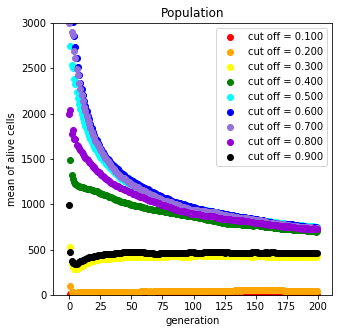

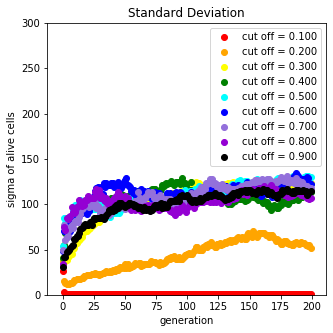

In [13]:
# lets time how long this takes
start_time = time.time()

# user controlled variables
N_grid = 100 # size of universe's edge
generation_max = 200 # maximum number of time steps
ave_max = 100 # total number of averages

# inital values equal to or greater than cut_off_value are alive (1), the rest dead (0)
cut_off_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

cut_off_array,std_dev_array = evolve_universe(N_grid,generation_max,ave_max,cut_off_values)

# How long did this take?
stop_time = time.time()
print("Time to completition (min): ", (stop_time - start_time) / 60 )

# make some plots!
make_plots(cut_off_array,std_dev_array,cut_off_values,generation_max)

Interesting! 

* populations with 0.1 or 0.2 cutoff as alive at the start die out
* populations w/ 0.3 and above and 0.9 cutoff behave similarily?! 
* populations w/ 0.4, 0.5, 0.6, 0.7 & 0.8 cutoff as alive look to trend to a common population size
* populations w/ 0.3, 0.4, and 0.9 cutoff have a dip then recovery

I guess there is a [Goldilocks principle](https://en.wikipedia.org/wiki/Goldilocks_principle) for The Game of Life. During the random seeding of the universe initially low cut-cut off values would results in alive cells that are sparcely spaced. Game of Life rule #1 states "Any live cell with fewer than two live neighbours dies, as if by underpopulation" so this would explain the die-off. Also, if the universe is too densely populated initially then Game of Life Rule #3, which states "Any live cell with more than three live neighbours dies, as if by overpopulation", would imply a die-off for large cut-off values. It is interesting that the 0.3 cut-off and 0.9 cut-off seem to behave similarly. Cut-off values between 0.4 and 0.8 seem to belong in the Goldilocks zone for the Game of Life although there is some variability within that range.

The plot of standard deviations is also noteworthy. Initially there is low deviation in the populations which makes sense since we seed these universes randomly. As the universes evolve under the Game of Life rules there is more variability in the popualtion size as the generations go by. In the end most universes settle down to a population after 200 generations that are within 100 alive cells of the mean. This is still quite a bit of variability on a mean that seems to be ~700 or so. We could try to decrease the standard deviation by increasing the number of averages but that could result in a very long run-time with no real benefit - ie the trends in population size vs generation are clear.

Two options for further analysis come to mind:
1. We can explore the cut-off value range between 0.2 to 0.5 more closely to illuminate that jump between a dead universe to an alive universe.
2. We could extend the number of generations for a few select cut-off values to see if the gap between the barely alive universes and the alive universes stays distinct or if it closes.

### Option 1
Explore the cut-off value range between 0.2 to 0.5 more closely to illuminate that jump between a dead universe to an alive universe:

The current cut-off value is:  0.2
The current cut-off value is:  0.233
The current cut-off value is:  0.266
The current cut-off value is:  0.3
The current cut-off value is:  0.333
The current cut-off value is:  0.366
The current cut-off value is:  0.4
The current cut-off value is:  0.433
The current cut-off value is:  0.466
Time to completition (min):  93.47690971692403


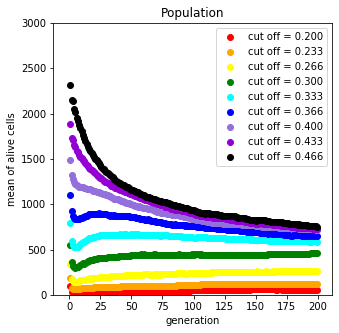

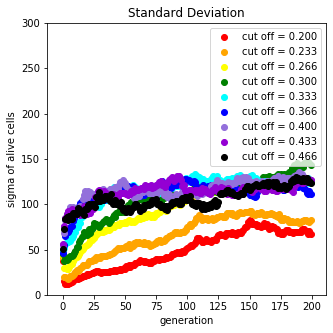

In [14]:
# lets time how long this takes
start_time = time.time()
# user controlled variables
N_grid = 100 # size of universe's edge
generation_max = 200 # maximum number of time steps
ave_max = 100 # total number of averages

# inital values equal to or greater than cut_off_value are alive (1), the rest dead (0)
cut_off_values = [0.2,0.233,0.266,0.3,0.333,0.366,0.4,0.433,0.466]

cut_off_array,std_dev_array = evolve_universe(N_grid,generation_max,ave_max,cut_off_values)

# How long did this take?
stop_time = time.time()
print("Time to completition (min): ", (stop_time - start_time) / 60 )

# make some plots!
make_plots(cut_off_array,std_dev_array,cut_off_values,generation_max)

That is beautiful! Interesting steady progression from a dead universe to a living one. I am intriqued by the dip and recovery on the population with cut-off values between 0.2 and 0.4. I wonder what is happening there.

### Option 2
Extend the number of generations for a few select cut-off values to see if the gap between the barely alive universes and the alive universes stays distinct or if it closes:

The current cut-off value is:  0.3
The current cut-off value is:  0.5
The current cut-off value is:  0.9
Time to completition (min):  124.646435379982


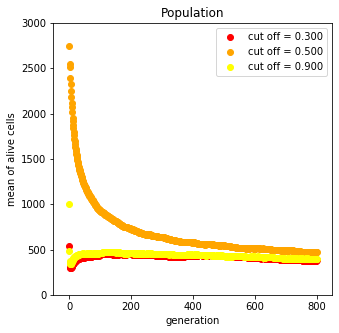

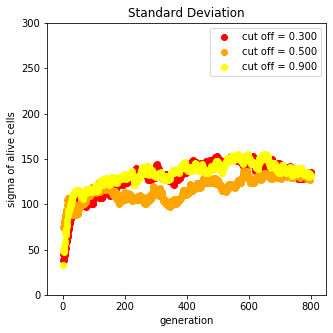

In [15]:
# lets time how long this takes
start_time = time.time()
# user controlled variables
N_grid = 100 # size of universe's edge
generation_max = 800 # maximum number of time steps
ave_max = 100 # total number of averages

# inital values equal to or greater than cut_off_value are alive (1), the rest dead (0)
cut_off_values = [0.3,0.5,0.9]

cut_off_array,std_dev_array = evolve_universe(N_grid,generation_max,ave_max,cut_off_values)

# How long did this take?
stop_time = time.time()
print("Time to completition (min): ", (stop_time - start_time) / 60 )

# make some plots!
make_plots(cut_off_array,std_dev_array,cut_off_values,generation_max)

Well, that is interesting. Looks like, given the standard deviation values, there is no distinction between the final universe populations independent of starting cut-off value. At least the final population is stable and significantly above zero. There is apparently quite a bit of research into initial configerations of cells that increase the population with time. I don't think these configerations can arise from random seeding (discounting infinite computers running infinite simulations for all time).

### Future Directions
A couple directions for further exploration come to mind:
1. We could modify the Rules of the Game to see what happens to the population. Options include extending the range for testing the region around a cell, create a third state other than alive or dead (maybe hibernating? or child? or different species?) that obeys different rules with a corresponding addition to the color map for displaying these new states.
2. We could learn about self-replicating configerations of cells or configerations that generate new material that can fill the universe.
3. We could plant regions of "food" or "posion" in the universe with some basic rules for how cells interact with those regions with the idea to move more toward a model for bacteria on a petri dish. Would need to consider how to let the cells move in the grid.

Happy Experimenting!